# TensorFlow Tutorial For Beginners 2019
https://www.datacamp.com/community/tutorials/tensorflow-tutorial

# 標準化 Keras：TensorFlow 2.0 高級 API 指南
https://hk.saowen.com/a/40ec1d0a03619a465bc852cfec5561c6d5d1e3be7f29fb8adc58b0c2930617db

# TensorFlow 基本使用與分散式概念
https://kairen.github.io/2017/04/10/tensorflow/intro/

In [1]:
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the resault
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


In [2]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]


In [3]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


In [4]:
config=tf.ConfigProto(log_device_placement=True)

In [5]:
config

log_device_placement: true

In [11]:
import os
import skimage
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

#ROOT_PATH = "/your/root/path"
#train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
#test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

train_data_directory = os.path.join("Training")
test_data_directory = os.path.join("Testing")

images, labels = load_data(train_data_directory)


In [25]:
import numpy as np

# Print the first instance of `images`
images = np.array(images)
images[2].shape

(244, 253, 3)

In [28]:
labels

list

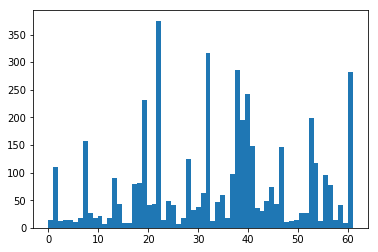

In [29]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

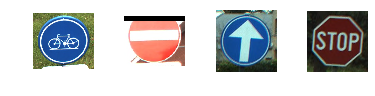

In [34]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [46]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [53]:
print(len(images28))
images28[1].shape

4575


(28, 28, 3)

# To Try
https://navoshta.com/traffic-signs-classification/

import numpy as np
from sklearn.utils import shuffle
from skimage import exposure

def preprocess_dataset(X, y = None):
    #Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
      
    # Apply localized histogram localization  
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(43)[y]
        # Shuffle the data
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y